#**Vending Machine Consumer insights**
Sebuah perusahaan Vending Machine ingin melakukan analisis terkait dengan penjualan dari vending machinenya. Analisis ini memiliki beberapa tujuan diantaranya adalah

*   Mengetahui pola dan preferensi pelanggan.
*   Penjualan Produk (pola permintaan).
*   Memberikan insight yang actionable sehingga perusahan dapat meningkatkan penjualan dan efisiensi.



## Setup kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prazkaa","key":"0110a1e9671bcbd3ca16e5d4a51d574b"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download awesomeasingh/vending-machine-sales

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset URL: https://www.kaggle.com/datasets/awesomeasingh/vending-machine-sales
License(s): CC0-1.0
  0% 0.00/147k [00:00<?, ?B/s]
100% 147k/147k [00:00<00:00, 52.1MB/s]


In [ ]:
!unzip vending-machine-sales.zip

Archive:  vending-machine-sales.zip
  inflating: vending_machine_sales.csv  


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('vending_machine_sales.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


Deskripsi "Kategori" dataset Vending Machine Sales dan penjelasan setiap kolom :

1. Status = status pembelian produk
2. Device ID = nomor ID vending machine
3. Location = lokasi dari vending machine
4. Machine = nama mesin
5. Product = produk yang terjual
6. Category = jenis makanan
7. TransDate = tanggal transaksi produk
8. Type = tipe pembelian cash atau credit
9. Transaction = nomor transaksi
10. RCoil = jumlah baris produk pada setiap vending machine
11. RPrice = harga produk
12. RQty = kuantitas produk yang keluar dari vending machine
13. MCoil = jumlah baris produk pada setiap vending machine
14. MPrice = harga produk
15. MQty = kuantitas produk yang keluar dari vending machine
16. LineTotal = harga produk
17. TransTotal = total transaksi produk
18. PrcdDate = tanggal detail transaksi produk


### Tipe Data dan Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Status,0
Device ID,0
Location,0
Machine,0
Product,6
Category,267
Transaction,0
TransDate,0
Type,0
RCoil,0


Terdapat missing value pada beberapa fitur diataranya adalah :

*   Product (6 rows)
*   Category (267 rows)
* MPrice (3 rows)



#### Missing Value Handling

In [ ]:
# Menghapus baris dengan missing value pada kolom 'Product'
df.dropna(subset=['Product'], inplace=True)

# Menghapus baris dengan missing value pada kolom 'MPrice'
df.dropna(subset=['MPrice'], inplace=True)
df.isnull().sum()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Status,0
Device ID,0
Location,0
Machine,0
Product,0
Category,261
Transaction,0
TransDate,0
Type,0
RCoil,0


kita hapus missing data, alasan mengapa category tidak dihapus karena lumayan banyak data yang hilang dan sebenarnya bisa diinput manual berdasarkan produk yang terjual.

#### Fitur engineering
Berdasarkan hasil analisis, didapatkan beberapa fitur yang tidak diperlukan sehingga akan dihapus untuk memudahkan

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


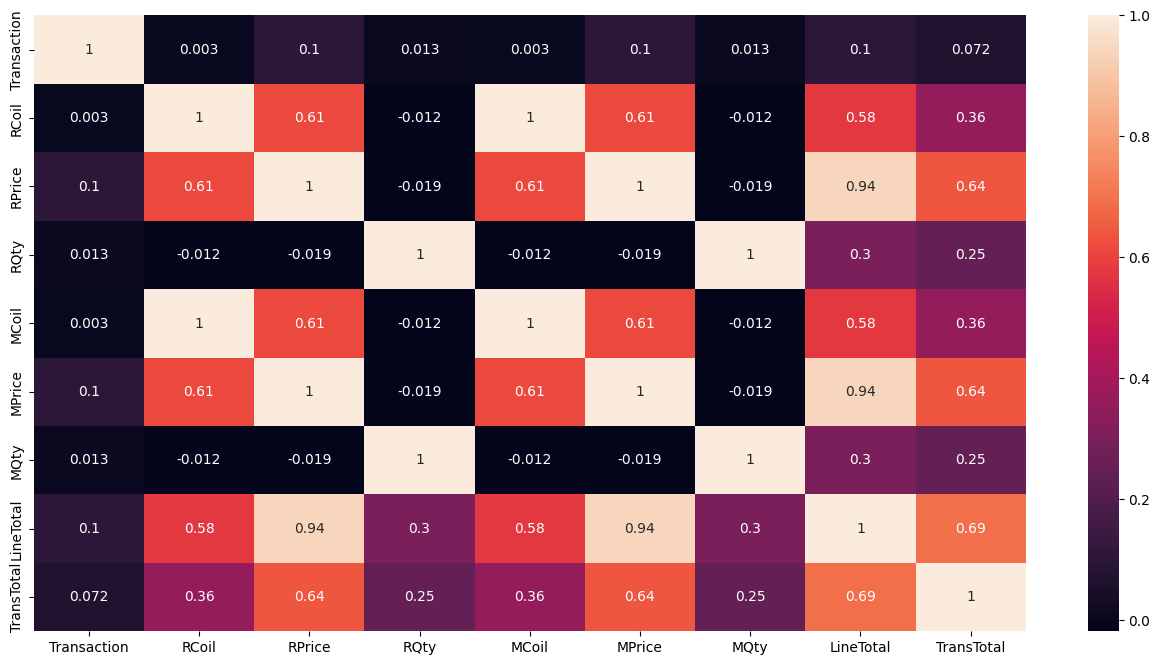

In [ ]:
#menampilkan distribusi data dalam bentuk heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

## Penjualan setiap bulannya 📈

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


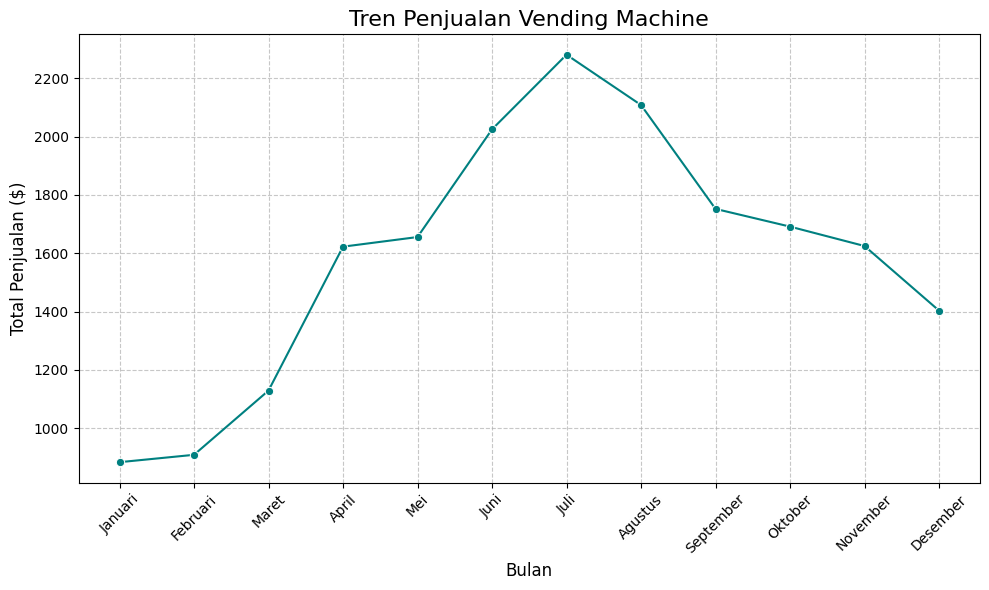

In [ ]:
import calendar
df["TransDate"] = pd.to_datetime(df["TransDate"], errors='coerce')
# Hitung total penjualan per bulan
sales_trend = df.groupby(df["TransDate"].dt.month)["LineTotal"].sum()

# Atur sumbu X agar Januari dimulai dari 1
x_positions = range(1, len(sales_trend) + 1)

# Konversi angka bulan menjadi nama bulan (Indonesia)
month_names_id = ["Januari", "Februari", "Maret", "April", "Mei", "Juni",
                  "Juli", "Agustus", "September", "Oktober", "November", "Desember"]  # Bahasa Indonesia

# Buat DataFrame untuk mempermudah Seaborn
sales_data = pd.DataFrame({
    'Bulan': month_names_id[:len(sales_trend)],
    'Penjualan': sales_trend.values
})

# Plot grafik menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='Bulan', y='Penjualan', marker='o', linestyle='-', color='teal')

# Menambahkan elemen visual yang lebih menarik
plt.title("Tren Penjualan Vending Machine", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penjualan ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


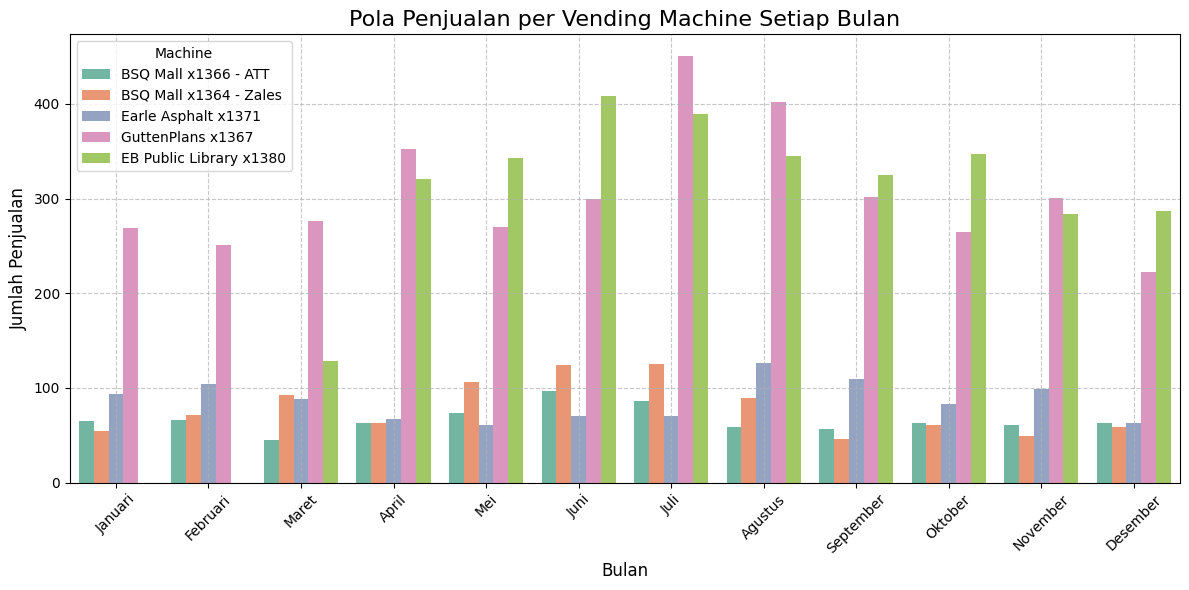

In [ ]:
df['Bulan'] = df["TransDate"].dt.month

# Konversi angka bulan menjadi nama bulan (Indonesia)
month_names_id = ["Januari", "Februari", "Maret", "April", "Mei", "Juni",
                  "Juli", "Agustus", "September", "Oktober", "November", "Desember"]  # Bahasa Indonesia
df['BulanNama'] = df['Bulan'].apply(lambda x: month_names_id[x - 1])

# Plot countplot menggunakan Seaborn untuk melihat pola penjualan per vending machine
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BulanNama', hue='Machine', palette='Set2')

plt.title("Pola Penjualan per Vending Machine Setiap Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()

**Hasil Analisis**
1. Pola penjualan vending machine dalam 5 bulan terakhir cenderung menurun, hal ini normal karena penjualan terendah sebelumnya terjadi di bulan januari dan februari sebelum kemudian naik pada bulan maret. Berdasarkan siklus tersebut maka kemungkinan penjualan di januari dan februari akan lebih menurun dibanding bulan desember.

2. Penjualan bulan januari februari hingga maret lebih rendah karena belum ada vending machine pada perpustakaan belum beroperasi dengan optimal sehinggal penjualan cenderung meningkat di bulan maret dan april. Diperlukan data pendukung seperti hasil rata rata penjualan pada bulan april-desember untuk melihat pola penjualan saat ini apakah sedang meningkat atau menurun


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


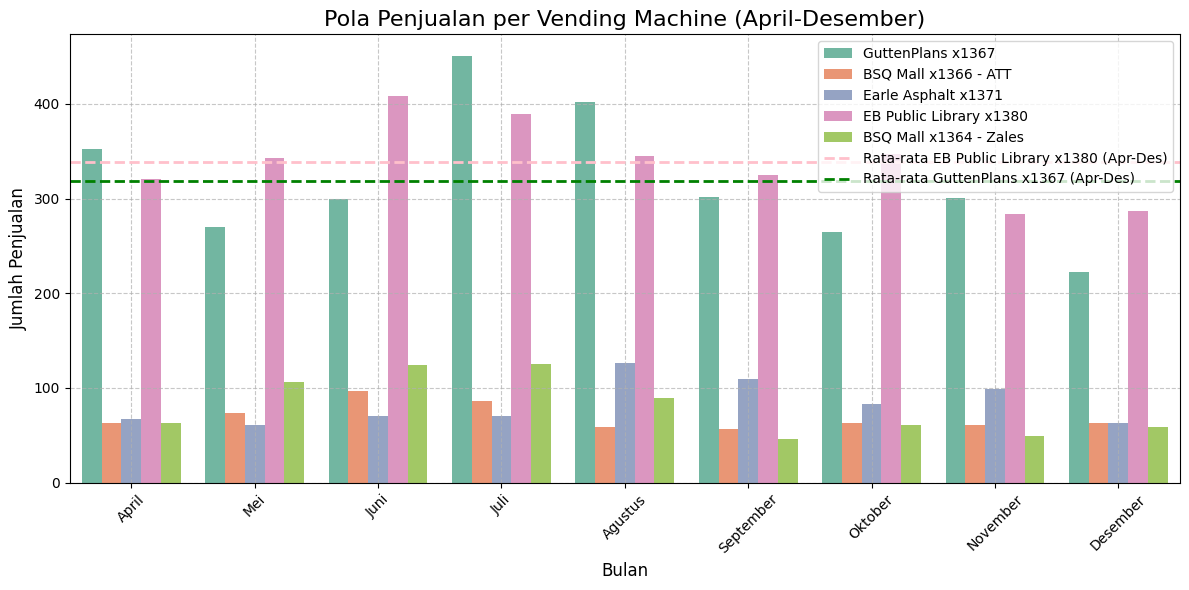

In [ ]:
# Filter data hanya untuk bulan April hingga Desember (4-12)
df_apr_des = df[df['Bulan'].between(4, 12)]

# Hitung rata-rata penjualan per vending machine (berdasarkan jumlah transaksi)
# Karena periode April-Desember mencakup 9 bulan, rata-ratanya = total transaksi / 9
avg_sales_by_machine = df_apr_des.groupby('Machine').size() / 9

# Mesin yang ingin ditampilkan garis rata-ratanya beserta warna masing-masing
selected_machines = {
    'EB Public Library x1380': 'pink',
    'GuttenPlans x1367': 'green'
}

# Buat countplot untuk periode April-Desember
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_apr_des, x='BulanNama', hue='Machine', palette='Set2')

# Tambahkan garis horizontal rata-rata hanya untuk mesin terpilih dengan warna berbeda
for machine, color in selected_machines.items():
    if machine in avg_sales_by_machine.index:
        avg = avg_sales_by_machine[machine]
        plt.axhline(avg, linestyle='--', linewidth=2, color=color, label=f'Rata-rata {machine} (Apr-Des)')

plt.title("Pola Penjualan per Vending Machine (April-Desember)", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Menghindari duplikasi label di legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()


**Hasil Analisis**
3. Berdasarkan rata rata didapatkan bahwa pola penjualan sedang menurun terutama pada september hingga desember di dua vending machine dengan penjualan teratas.
4. Penjualan pada bulan juli hingga agustus meningkat hal ini dikarenakan faktor liburan musim panas sekolah sehingga banyak orang beraktivitas diluar ruangan sementara pada november hingga februari cenderung rendah karena sedang musim salju sehingga orang orang jarang beraktivitas diluar.
**Rekomendasi**
1. Penjualan akan menurun pada bulan november hingga februari. Diperlukan promosi serta diskon untuk mengstimulus penjualan sehingga bisa meningkatkan penjualan pada periode tersebut yang kemungkinan akan menurun.
2. Meningkatkan stok produk dan supply logistik pada periode juni - agustus untuk meminimalisir vending machine out of stock sehingga meminimalisir potensi customer tidak jadi membeli.

## 💵 Penjualan per Vending Machine 💵

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-088ae62f75e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue.index, y=revenue.values, palette='viridis', ax=axes[0])
<ipython-input-33-088ae62f75e8>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(revenue.index, rotation=45, ha='right')
<ipython-input-33-088ae62f75e8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

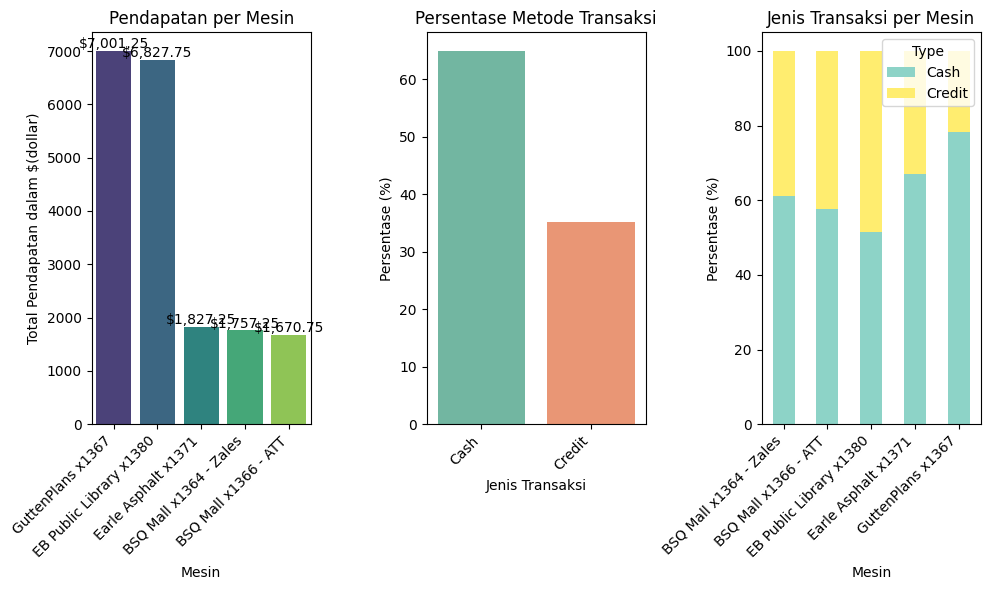

In [ ]:
# Membuat subplots dalam satu bingkai
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Visualisasi Revenue per Machine
revenue = df.groupby('Machine')['LineTotal'].sum().sort_values(ascending=False)
sns.barplot(x=revenue.index, y=revenue.values, palette='viridis', ax=axes[0])
axes[0].set_title('Pendapatan per Mesin')
axes[0].set_xlabel('Mesin')
axes[0].set_ylabel('Total Pendapatan dalam $(dollar)')
axes[0].tick_params(axis='x', rotation=45)

# Menyesuaikan posisi xticks untuk menghindari tumpang tindih
axes[0].set_xticklabels(revenue.index, rotation=45, ha='right')

# Menambahkan nilai di atas setiap bar
for p in axes[0].patches:
    axes[0].annotate(f'${p.get_height():,.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Visualisasi Transaction Method (Percentage)
transaction_method = df['Type'].value_counts(normalize=True) * 100
sns.barplot(x=transaction_method.index, y=transaction_method.values, palette='Set2', ax=axes[1])
axes[1].set_title('Persentase Metode Transaksi')
axes[1].set_xlabel('Jenis Transaksi')
axes[1].set_ylabel('Persentase (%)')

# Menyesuaikan posisi xticks untuk menghindari tumpang tindih
axes[1].set_xticklabels(transaction_method.index, rotation=45, ha='right')

# Visualisasi Transaction Type per Machine (Percentage)
transaction_per_machine = df.groupby('Machine')['Type'].value_counts(normalize=True) * 100
transaction_per_machine = transaction_per_machine.unstack().fillna(0)
transaction_per_machine.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3', ax=axes[2])
axes[2].set_title('Jenis Transaksi per Mesin')
axes[2].set_xlabel('Mesin')
axes[2].set_ylabel('Persentase (%)')

# Menyesuaikan posisi xticks untuk menghindari tumpang tindih
axes[2].set_xticklabels(transaction_per_machine.index, rotation=45, ha='right')

# Menampilkan semua plot dalam satu bingkai
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


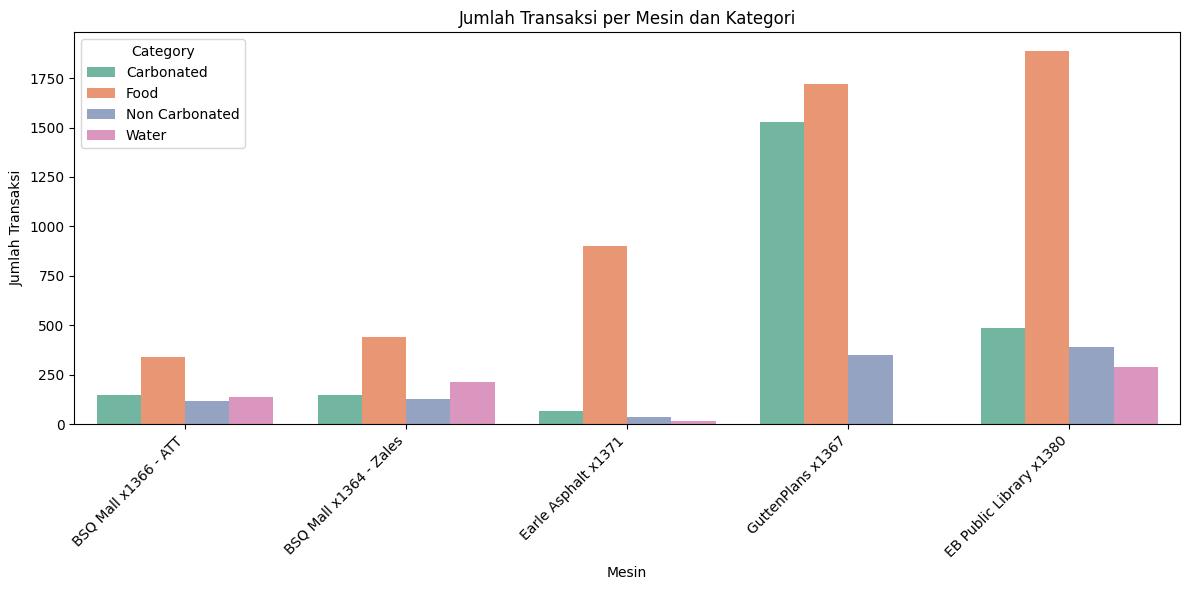

In [ ]:
# Visualisasi transaksi berdasarkan mesin dan kategori
plt.figure(figsize=(12, 6))
sns.countplot(x='Machine', hue='Category', data=df, palette='Set2')
plt.title('Jumlah Transaksi per Mesin dan Kategori')
plt.xlabel('Mesin')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Hasil Analisis**
1. Penjualan Tertinggi  
 Penjualan tertinggi terdapat di vending machine yang terletak di daerah GuttenPlans dimana guttenplans merupakan sebuah toko yang menjual adonan, roti dan pastry. Kemungkinan penjualan tertinggi disini terjadi karena mereka membutuhkan cemilan dan minuman untuk menemani mereka memakan roti dan pastry. Hal ini didukung dengan data penjualan minuman bersoda tertinggi disana. Penjualan tertinggi selanjutnya terdapat di perpustakaan dimana hasil penjualanya hampir menyamai perpustakaan dimana vending machine ini baru dibuka pada bulan maret. Sementara penjualan terendah terdapat di daerah Mall karena disana banyak menjual produk produk sejenis sehingga memiliki banyak pesaing untuk produk makanan dan minuman.
---
**Rekomendasi **  
* Perusahaan bisa mengoptimalkan penjualan di sekitar perpustakaan karena cenderung lebih stabil dan minim fluktuatif serta berpotensi melampaui penjualan di guttenplan dengan mengoptimalkan dan memperbanyak produk pada makanan🍕, Selain itu perusahaan juga bisa mengoptimalkan penjualan di makanan dan minuman bersoda untuk vending machine di guttenplan🥤
* Perusahaan dapat memindahkan vending machine dengan penjualan terendah ke sekitar toko roti dan perpustakaan dengan perkiraan peningkatan pendapatan yang dapat diraih yaitu hingga 400% 📈


## Produk

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-d99fcec2ee6d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


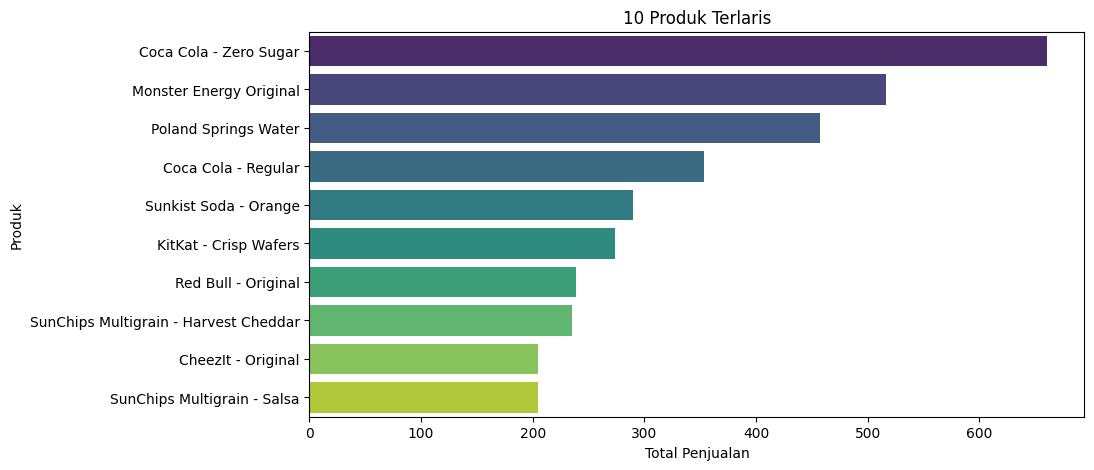

In [ ]:
top_products = df.groupby("Product")["RQty"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Penjualan")
plt.ylabel("Produk")
plt.title("10 Produk Terlaris")
plt.show()

** Hasil Analisis**
Produk yang paling digemari oleh customer dari seluruh vending machine adalah coca cola zero sugar dengan penjualan diatas 600 dan diikuti dengan monster energy yaitu diatas 500. 2 Produk teratas didominasi oleh kategori minuman bersoda

## Rekomendasi Produk Bundling

In [ ]:
df_basket = df.groupby(['Transaction', 'Product'])['RQty'].sum().unstack().fillna(0)

# Konversi ke format binary (1 jika produk dibeli, 0 jika tidak)
df_basket = df_basket.applymap(lambda x: 1 if x > 0 else 0)

# Konversi ke Boolean untuk Apriori
df_basket = df_basket.astype(bool)

print(df_basket.head(10))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-064c144bb27c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_basket = df_basket.applymap(lambda x: 1 if x > 0 else 0)


Product      Autumns Granola Bar - Cinnamon Almond  \
Transaction                                          
14515778905                                  False   
14516018629                                  False   
14516020373                                  False   
14516021756                                  False   
14517568743                                  False   
14518731524                                  False   
14519162059                                  False   
14519670154                                  False   
14520315330                                  False   
14520522827                                  False   

Product      Bai Antioxidant - Brasilia BB  Bai Antioxidant - Kula Watermelon  \
Transaction                                                                     
14515778905                          False                              False   
14516018629                          False                              False   
14516020373                

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Jalankan Algoritma Apriori
frequent_itemsets = apriori(df_basket, min_support=0.003, use_colnames=True)

# Pastikan itemset tidak kosong
print(frequent_itemsets.head())

# Buat aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Cek apakah hasil masih kosong
if rules.empty:
    print("Tidak ada aturan asosiasi yang ditemukan. Coba turunkan min_support lebih rendah.")
else:
    # Urutkan berdasarkan confidence tertinggi
    rules_sorted = rules.sort_values(by="confidence", ascending=False)

    # Tampilkan hasil
    print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    support                                      itemsets
0  0.007683  (Bai Antioxidant - Tanzania Lemon Super Tea)
1  0.003402             (Belvita Snack Packs - Blueberry)
2  0.003512     (BodyArmor  LYTE - Blueberry Pomegranate)
3  0.004500               (BodyArmor LYTE  - Peach Mango)
4  0.004061        (BodyArmor LYTE - Strawberry Lemonade)
Tidak ada aturan asosiasi yang ditemukan. Coba turunkan min_support lebih rendah.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


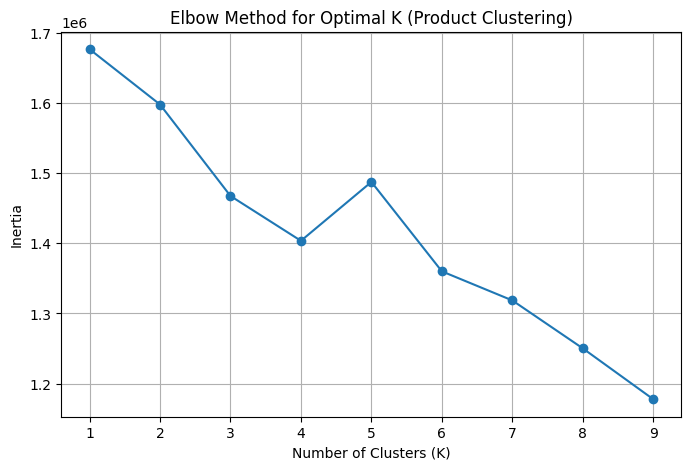

<ipython-input-38-72889e91f997>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=product_clusters, palette="viridis")


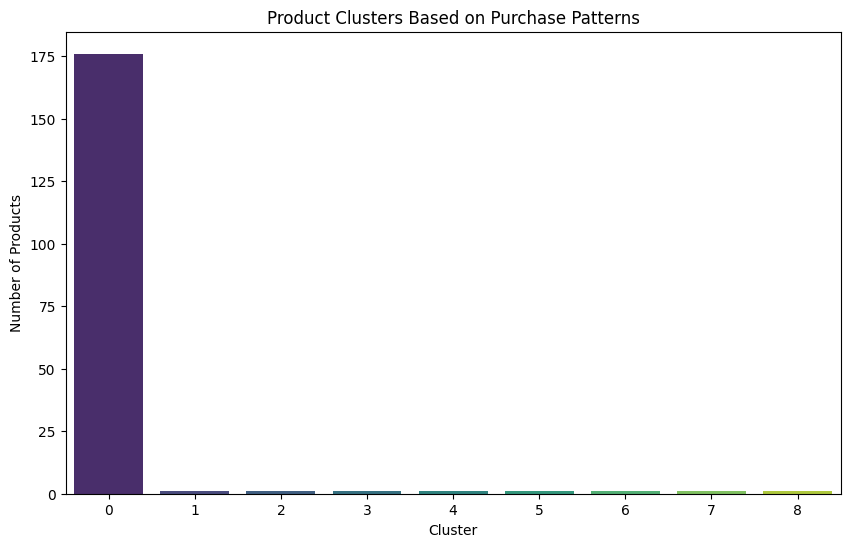

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table (products in columns, transactions in rows)
basket = df.pivot_table(index="Transaction", columns="Product", values="RQty", aggfunc="sum", fill_value=0)

# Normalize the data
scaler = StandardScaler()
basket_scaled = scaler.fit_transform(basket.T)  # Transpose to cluster by product, not transactions

# Determine optimal clusters using Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(basket_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K (Product Clustering)")
plt.grid()
plt.show()

# Apply K-Means with chosen K
optimal_k = 9  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(basket_scaled)

# Create a DataFrame to map products to clusters
product_clusters = pd.DataFrame({"Product": basket.columns, "Cluster": cluster_labels})

# Visualize clusters
plt.figure(figsize=(10,6))
sns.countplot(x="Cluster", data=product_clusters, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Products")
plt.title("Product Clusters Based on Purchase Patterns")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
cluster_labels = dbscan.fit_predict(basket_scaled)

# Tambahkan hasil cluster ke DataFrame
product_clusters = pd.DataFrame({"Product": basket.columns, "Cluster": cluster_labels})


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


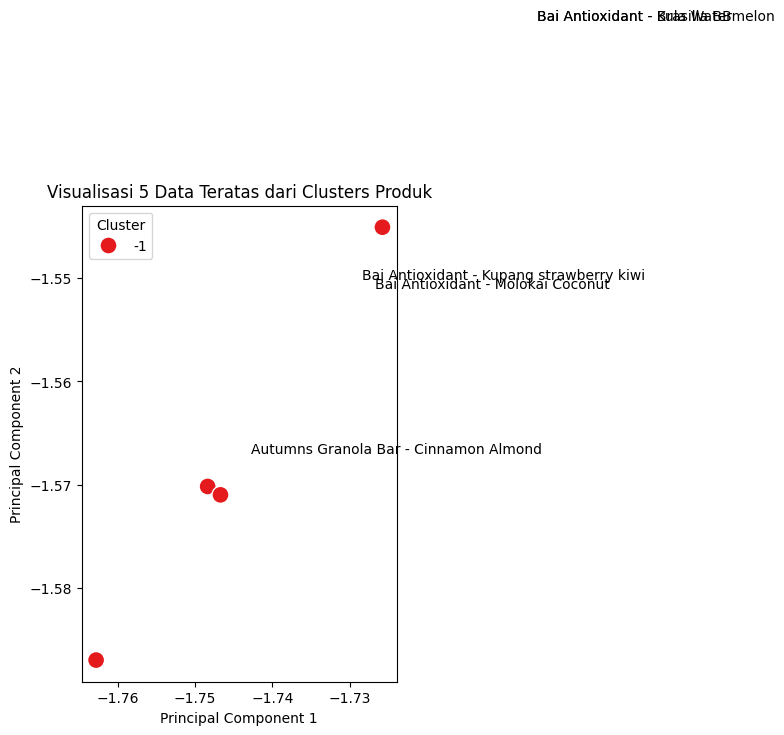

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan reduksi dimensi ke 2 komponen menggunakan PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(basket_scaled)

# Buat DataFrame yang menggabungkan hasil PCA dengan label cluster dan nama produk
df_clusters = pd.DataFrame(reduced_features, columns=["PC1", "PC2"])
df_clusters["Product"] = basket.columns  # pastikan urutan kolom sesuai dengan urutan pada basket_scaled
df_clusters["Cluster"] = cluster_labels

# Ambil 5 data teratas (misalnya 5 baris pertama)
top5 = df_clusters.head(5)

# Plot scatter plot untuk 5 data teratas
plt.figure(figsize=(10, 8))
sns.scatterplot(data=top5, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=150, legend='full')

# Tambahkan label produk untuk masing-masing titik
for _, row in top5.iterrows():
    plt.text(row["PC1"] + 0.02, row["PC2"] + 0.02, row["Product"], fontsize=10)

plt.title("Visualisasi 5 Data Teratas dari Clusters Produk")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


**Hasil Analisis**

Berdasarkan hasil analisis yang telah dilakukan menggunakan algoritma clustering KMeans, Apriori, dan DB scan didapati bahwa mayoritas customer hanya membeli satu produk dan tidak membeli produk lain. Apabila terdapat dua produk sangat jarang atau nilainya terlalu kecil untuk direkomendasikan. Hal ini dikarenakan kebiasaan dari customer yang apabila menggunakan vending machine hanya membeli satu product saja dan tidak membeli dua produk secara bersamaan. Apabila ingin membeli produk lainnya customer cenderung memesan kembali pada vending machine. Alternatif lain yang bisa dilakukan adalah membundling produk dari kategori berbeda misal produk terlaris pada carbonated di bundling dengan produk terlaris dari kategori makanan.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Pastikan dataset memiliki kolom 'Transaction_ID' dan 'Product'
df_basket = df.groupby(['Transaction', 'Product'])['RQty'].sum().unstack().fillna(0)

# Ubah menjadi format binary (1 jika produk dibeli dalam transaksi, 0 jika tidak)
df_basket = df_basket.map(lambda x: 1 if x > 0 else 0)

# Pastikan data bertipe boolean untuk Apriori
df_basket = df_basket.astype(bool)

# Gunakan Algoritma Apriori untuk mencari frequent itemsets
frequent_itemsets = apriori(df_basket, min_support=0.005, use_colnames=True)

# Buat association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Urutkan aturan berdasarkan confidence tertinggi
rules_sorted = rules.sort_values(by="confidence", ascending=False)

# Tampilkan 10 bundle terbaik berdasarkan confidence
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


# KESIMPULAN

Berdasarkan tujuan di awal yaitu:
* mengetahui pola dan preferensi pelanggan.
*   Penjualan Produk (pola permintaan).
*   Memberikan insight yang actionable sehingga perusahan dapat meningkatkan penjualan dan efisiensi.
Maka dibuat sebuah analisis yaitu sebagai berikut :  

## Penjualan per bulan
1.  Pola penjualan vending machine dalam 5 bulan terakhir cenderung menurun, hal ini normal karena penjualan terendah sebelumnya terjadi di bulan januari dan februari sebelum kemudian naik pada bulan maret. Berdasarkan siklus tersebut maka kemungkinan penjualan di januari dan februari akan lebih menurun dibanding bulan desember.

2. Penjualan bulan januari februari hingga maret lebih rendah karena belum ada vending machine pada perpustakaan belum beroperasi dengan optimal sehinggal penjualan cenderung meningkat di bulan maret dan april. Diperlukan data pendukung seperti hasil rata rata penjualan pada bulan april-desember untuk melihat pola penjualan saat ini apakah sedang meningkat atau menurun
3. Berdasarkan rata rata didapatkan bahwa pola penjualan sedang menurun terutama pada september hingga desember di dua vending machine dengan penjualan teratas.
4. Penjualan pada bulan juli hingga agustus meningkat hal ini dikarenakan faktor liburan musim panas sekolah sehingga banyak orang beraktivitas diluar ruangan sementara pada november hingga februari cenderung rendah karena sedang musim salju sehingga orang orang jarang beraktivitas diluar.

## Business Recommendation
1. Penjualan akan menurun pada bulan november hingga februari. Diperlukan promosi serta diskon untuk mengstimulus penjualan sehingga bisa meningkatkan penjualan pada periode tersebut yang kemungkinan akan menurun.
2. Meningkatkan stok produk dan supply logistik pada periode juni - agustus untuk meminimalisir vending machine out of stock sehingga meminimalisir potensi customer tidak jadi membeli akibat stok kosong.


## Penjualan pada setiap vending machine
Penjualan tertinggi terdapat di vending machine yang terletak di daerah GuttenPlans dimana guttenplans merupakan sebuah toko yang menjual adonan, roti dan pastry. Kemungkinan penjualan tertinggi disini terjadi karena mereka membutuhkan cemilan dan minuman untuk menemani mereka memakan roti dan pastry. Hal ini didukung dengan data penjualan minuman bersoda tertinggi disana. Penjualan tertinggi selanjutnya terdapat di perpustakaan dimana hasil penjualanya hampir menyamai perpustakaan dimana vending machine ini baru dibuka pada bulan maret. Sementara penjualan terendah terdapat di daerah Mall karena disana banyak menjual produk produk sejenis sehingga memiliki banyak pesaing untuk produk makanan dan minuman.

## Business Recommendation
1. Perusahaan bisa mengoptimalkan penjualan di sekitar perpustakaan karena cenderung lebih stabil dan minim fluktuatif serta berpotensi melampaui penjualan di guttenplan dengan mengoptimalkan dan memperbanyak produk pada makanan🍕, Selain itu perusahaan juga bisa mengoptimalkan penjualan di makanan dan minuman bersoda untuk vending machine di guttenplan🥤
2. Perusahaan dapat memindahkan vending machine dengan penjualan terendah ke sekitar toko roti dan perpustakaan dengan perkiraan peningkatan pendapatan yang dapat diraih yaitu hingga 350% 📈 berdasarkan data penjualan dari kedua tempat tersebut yang cukup jauh gapnya.